# Kmeans clustering 

## Imports/Flags

In [124]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

OUTPUT_PICKLE = True


In [125]:
access = pd.read_pickle("Datasets/access")
assistance = pd.read_pickle("Datasets/assistance")
health = pd.read_pickle("Datasets/health")
local = pd.read_pickle("Datasets/local")
population = pd.read_pickle("Datasets/population")
restaurants = pd.read_pickle("Datasets/restaurants")
socioecnomic = pd.read_pickle("Datasets/socioeconomic")
stores = pd.read_pickle("Datasets/stores")

In [126]:
df_list = [access,
          assistance, 
          health, 
          local, 
          population,
          restaurants, 
          socioecnomic, 
          stores]

## Create df and scale

In [127]:
merged_df = access.copy()
for df in df_list[1:]:
    to_merge = df.copy().drop(columns=["State", "County"])
    merged_df = merged_df.merge(to_merge, on="FIPS")

In [128]:
merged_df = merged_df.drop(columns=["FIPS", "State", "County", "Abrv"])

In [129]:
if OUTPUT_PICKLE:
    print("pickling pickle")
    merged_df.to_pickle("Datasets/merged_dataset")
else:
    print("outta pickles!")

pickling pickle


In [56]:
merged_df.head()

,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,PCH_LACCESS_LOWI_10_15,PCT_LACCESS_LOWI10,PCT_LACCESS_LOWI15,...,PCH_SNAPS_12_16,SNAPSPTH12,SNAPSPTH16,PCH_SNAPSPTH_12_16,WICS08,WICS12,PCH_WICS_08_12,WICSPTH08,WICSPTH12,PCH_WICSPTH_08_12
0,18428.44,17496.69,-5.06,33.77,32.06,5344.43,6543.68,22.44,9.79,11.99,...,12.69,0.67,0.76,12.89,6,5,-16.67,0.12,0.09,-24.41
1,35210.81,30561.26,-13.20,19.32,16.77,9952.14,9886.83,-0.66,5.46,5.42,...,43.19,0.73,0.95,30.99,25,27,8.00,0.14,0.14,-0.25
2,5722.31,6069.52,6.07,20.84,22.11,3135.68,2948.79,-5.96,11.42,10.74,...,0.96,1.28,1.35,5.76,6,7,16.67,0.20,0.26,27.97
3,1044.87,969.38,-7.22,4.56,4.23,491.45,596.16,21.31,2.14,2.60,...,20.51,0.72,0.86,20.27,6,5,-16.67,0.28,0.22,-20.38
4,1548.18,3724.43,140.57,2.70,6.50,609.03,1650.96,171.08,1.06,2.88,...,23.90,0.66,0.82,24.17,10,6,-40.00,0.17,0.10,-40.03


In [57]:
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(merged_df)

## PCA

I am choosing to reduce all features maintaining a different level of variance. 

In [58]:
pca = PCA(n_components = 0.9)
pca.fit(data_rescaled)
reduced_90 = pca.transform(data_rescaled)

In [59]:
reduced_90.shape

(3140, 25)

In [60]:
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced_95 = pca.transform(data_rescaled)

In [61]:
reduced_95.shape

(3140, 39)

In [62]:
pca = PCA(n_components = 0.99)
pca.fit(data_rescaled)
reduced_99 = pca.transform(data_rescaled)

In [63]:
reduced_99.shape

(3140, 74)

## Elbow Method

### 90% variance

In [66]:
distortions90 = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(reduced_90)
    kmeanModel.fit(reduced_90)
    distortions90.append(sum(np.min(cdist(reduced_90, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / reduced_90.shape[0])

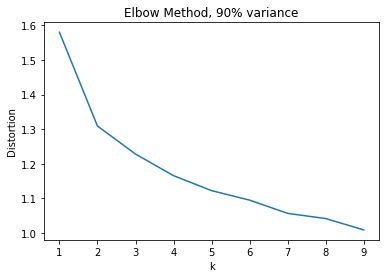

In [67]:
plt.plot(K, distortions90)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method, 90% variance')
plt.show()

Using 90% variance and loooking at the elbow plot, I would choose two clusters. 

### 95% Variance

In [68]:
distortions95 = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(reduced_95)
    kmeanModel.fit(reduced_95)
    distortions95.append(sum(np.min(cdist(reduced_95, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / reduced_95.shape[0])

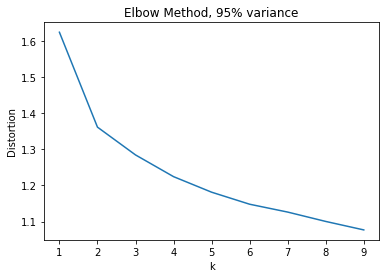

In [69]:
plt.plot(K, distortions95)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method, 95% variance')
plt.show()

With 95% variance, there is still the same 'elbow' at two clusters. 

### 99% Variance

In [70]:
distortions99 = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(reduced_99)
    kmeanModel.fit(reduced_99)
    distortions99.append(sum(np.min(cdist(reduced_99, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / reduced_99.shape[0])

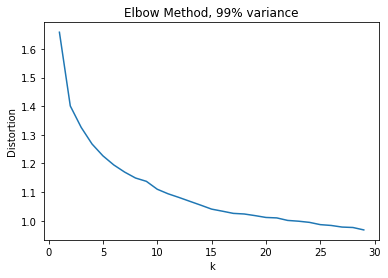

In [71]:
plt.plot(K, distortions99)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method, 99% variance')
plt.show()

Similar to previous graphs, 2 clusters looks to be the most accurate. I tried upto 30 clusters to see if there would be a sharp 'elbow' further on, but it does not seem to be the case. Next I will try doing the test without PCA, to see if all the variance would affect the elbow point. 

### No PCA

In [73]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data_rescaled)
    kmeanModel.fit(data_rescaled)
    distortions.append(sum(np.min(cdist(data_rescaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data_rescaled.shape[0])

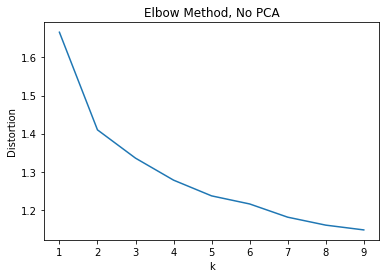

In [74]:
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method, No PCA')
plt.show()

Even when using no PCA, there is still a sharp curve at two clusters.

## Silhouette Method

### 90% Variance

In [75]:
sil90 = []
K = range(2,11)
for k in K:
  kmeans = KMeans(n_clusters = k).fit(reduced_90)
  labels = kmeans.labels_
  sil90.append(metrics.silhouette_score(reduced_90, labels, metric = 'euclidean'))

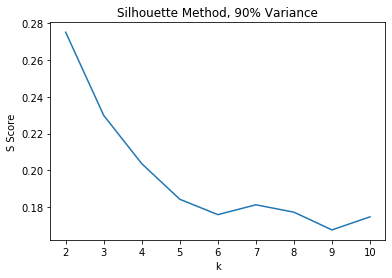

In [76]:
plt.plot(K, sil90)
plt.xlabel('k')
plt.ylabel('S Score')
plt.title('Silhouette Method, 90% Variance')
plt.show()

There is a clear peak at 2 - but the score itself is not very high. Since the closer to 1 the score is the better is it clustered, I do not think that kmeans is providing very good clustering. I will first look at how the clustering is working with plots before moving on to a different model. 

## Plotting Kmeans

In [118]:
kmeans = KMeans(n_clusters = 2).fit(reduced_99)
clusters = kmeans.predict(reduced_99)

In [119]:
to_plot = pd.DataFrame(reduced_99)
to_plot["cluster_numbers"] = clusters

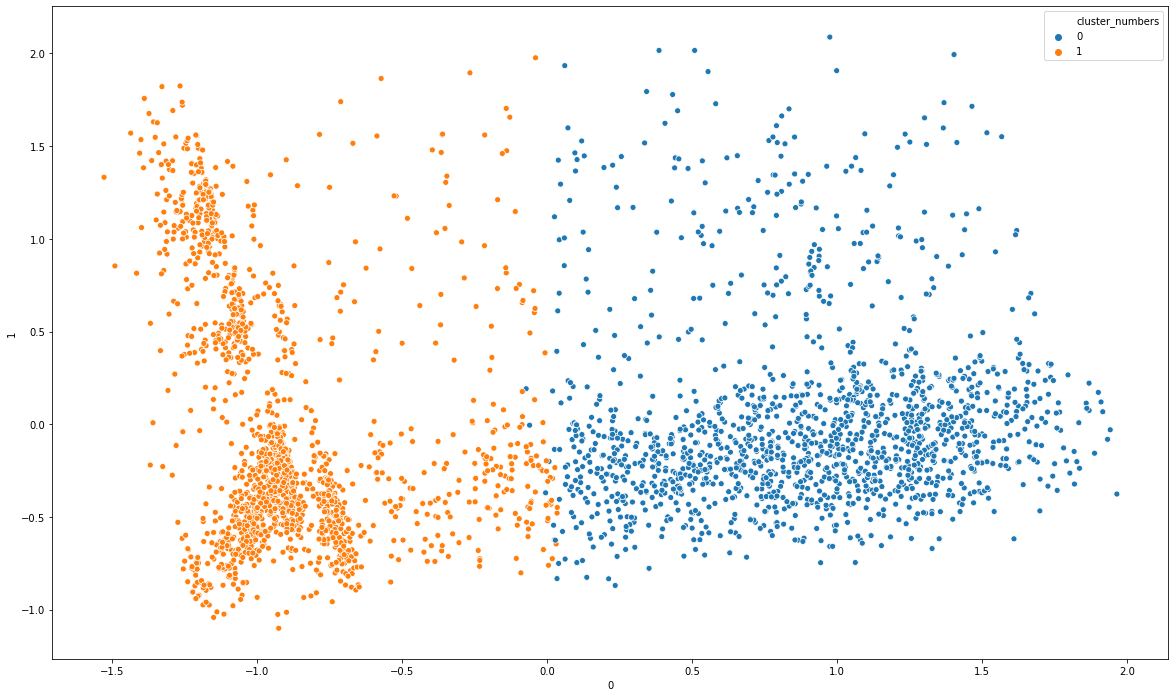

In [120]:
fig, ax = plt.subplots(figsize=(20, 12))
ax = sns.scatterplot(data=to_plot,
                    x=0,
                    y=1,
                    hue="cluster_numbers")

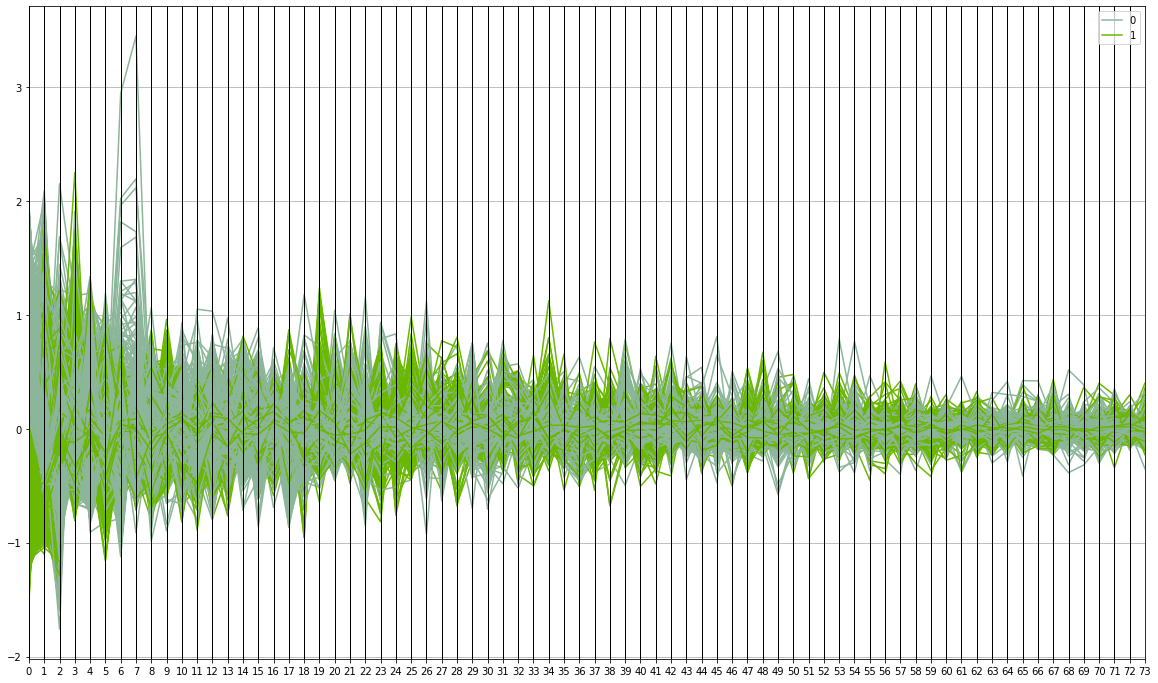

In [109]:
fig, ax = plt.subplots(figsize=(20, 12))
ax = pd.plotting.parallel_coordinates(to_plot, 'cluster_numbers');

As you can see in the scatter plot, the algorithem has created clusters successfully - but I hope to refine the model by increasing the number of clusters. However, if I do that with kmeans, the algorithm gets less and less precise. After looking into [sklean's documentation](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) I believe that mean shift or VBGM will be a better fit for my dataset. Additionally, I might try hierarchical clustering. 